In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:


train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
test_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

In [ ]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
#build the model
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
from torch.utils.data import dataset
# data loader
#useful because it automatically generates batches in the training loop
# and takes care of shuffling
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle = False
)

In [ ]:
# training the model
n_epochs = 10

# stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss =[]
  for inputs,targets in train_loader:
    #moving data to gpu
    inputs,targets = inputs.to(device),targets.to(device)

    #reshape the input
    inputs = inputs.view(-1,784)

    #zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs  = model(inputs)
    loss = criterion(outputs, targets)

    #backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
  # get the train and test loss
  train_loss = np.mean(train_loss)
  print(train_loss)

  test_loss = []
  for inputs,targets in test_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    inputs = inputs.view(-1,784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  # save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f"Epoch {it+1}/{n_epochs},Train Loss: {train_loss:.4f},Test Loss: {test_loss:.4f}")

0.40976164575769447
Epoch 1/10,Train Loss: 0.4098,Test Loss: 0.2230
0.1909055464875215
Epoch 2/10,Train Loss: 0.1909,Test Loss: 0.1573
0.13993950429628652
Epoch 3/10,Train Loss: 0.1399,Test Loss: 0.1243
0.10901638600173028
Epoch 4/10,Train Loss: 0.1090,Test Loss: 0.1064
0.08884799255649926
Epoch 5/10,Train Loss: 0.0888,Test Loss: 0.1008
0.07340658381422445
Epoch 6/10,Train Loss: 0.0734,Test Loss: 0.0855
0.061824338607934876
Epoch 7/10,Train Loss: 0.0618,Test Loss: 0.0807
0.0529712192984278
Epoch 8/10,Train Loss: 0.0530,Test Loss: 0.0782
0.04502814296466201
Epoch 9/10,Train Loss: 0.0450,Test Loss: 0.0736
0.03782357377752757
Epoch 10/10,Train Loss: 0.0378,Test Loss: 0.0745


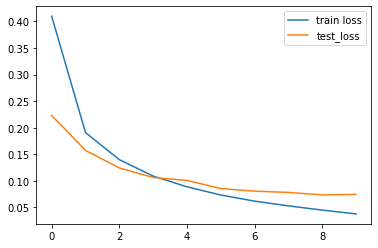

In [ ]:
# plot the train loss and test loss per iteration
plt.plot(train_losses,label = "train loss")
plt.plot(test_losses,label="test_loss")
plt.legend()
plt.show()

In [ ]:
# Calculating the accuracy
n_correct = 0.
n_total = 0.

for inputs, targets in train_loader:
  #move data to GPU
  inputs ,targets = inputs.to(device),targets.to(device)

  #reshape the input
  inputs = inputs.view(-1,784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _,predictions = torch.max(outputs,1)

  # update counts
  n_correct +=(predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc  = n_correct / n_total
print(f"{train_acc:.4f}")

0.9923


In [ ]:
#get all prediction in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test  = np.array([])

for inputs ,targets in test_loader:
  # move data to GPU
  inputs = inputs.to(device)

  # reshape the input
  inputs = inputs.view(-1,784)

  #forward pass
  outputs = model(inputs)

  # get prediction
  _, predictions = torch.max(outputs,1)

  # update p_test
  p_test = np.concatenate((p_test,predictions.cpu().numpy()))


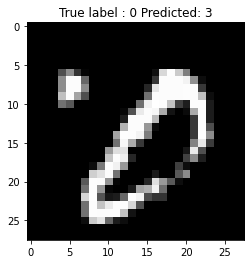

In [ ]:
# show some misclassified examples
misclassified_idx =np.where(p_test!=y_test)[0]
i =np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label : %s Predicted: %s"% (y_test[i],int(p_test[i])));